<a href="https://colab.research.google.com/github/SURESHASWATHI/Excelr_assignment/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform data preprocessing, feature engineering, and feature selection on the "Adult" dataset ("adult.csv") for a machine learning task, including handling missing values, applying scaling and encoding techniques, creating new features, transforming skewed features, and using Isolation Forest and PPS for feature selection and analysis.

## Data loading and exploration

### Subtask:
Load the dataset and perform initial exploration including checking for missing values, data types, and summary statistics.


**Reasoning**:
Load the dataset and perform initial exploration including checking for missing values, data types, and summary statistics.



In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/adult_with_headers.csv')

# Display the first 5 rows
display(df.head())

# Print column names and data types
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing values per column:
age               0
workclass         0
fnlwgt            0
educa

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Handle missing values

### Subtask:
Address any missing values found in the dataset.


**Reasoning**:
Based on the previous exploration, there were no explicit missing values (NaNs) found. However, the instructions mention that missing values can be represented by non-standard markers like '?' or empty strings. I need to check for these potential missing value representations in the object columns and handle them if found. I will check for '?' and empty strings and replace them with NaN, then check for the total number of missing values.



In [7]:
import numpy as np

# Check for '?' and empty strings in object columns and replace with NaN
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace(['?', ' '], np.nan)

# Re-check for missing values after replacing non-standard markers
print("\nMissing values per column after handling non-standard markers:")
print(df.isnull().sum())


Missing values per column after handling non-standard markers:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


## Scaling numerical features

### Subtask:
Apply Standard Scaling and Min-Max Scaling to numerical features and discuss their use cases.


**Reasoning**:
Select numerical columns, apply Standard Scaling and Min-Max Scaling, and store the results.



**Reasoning**:
Import the necessary scalers and re-run the scaling process.



In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Instantiate StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply Standard Scaling
df_standard_scaled = scaler_standard.fit_transform(df[numerical_cols])

# Apply Min-Max Scaling
df_minmax_scaled = scaler_minmax.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled data (as arrays)
print("Standard Scaled Data (first 5 rows):")
print(df_standard_scaled[:5])

print("\nMin-Max Scaled Data (first 5 rows):")
print(df_minmax_scaled[:5])

Standard Scaled Data (first 5 rows):
[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945]
 [ 0.83710898 -1.008707    1.13473876 -0.14592048 -0.21665953 -2.22215312]
 [-0.04264203  0.2450785  -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 [ 1.05704673  0.42580136 -1.19745882 -0.14592048 -0.21665953 -0.03542945]
 [-0.77576787  1.40817572  1.13473876 -0.14592048 -0.21665953 -0.03542945]]

Min-Max Scaled Data (first 5 rows):
[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918]
 [0.49315068 0.15106831 0.4        0.         0.         0.39795918]
 [0.15068493 0.22148843 0.8        0.         0.         0.39795918]]


**Reasoning**:
Briefly explain the difference between Standard Scaling and Min-Max Scaling and when to use each.



In [9]:
# In a text cell, briefly explain the difference between Standard Scaling and Min-Max Scaling and when you would typically use each.

# Standard Scaling (Standardization):
# - Centers the data around 0 with a standard deviation of 1.
# - The formula is z = (x - u) / s, where u is the mean and s is the standard deviation.
# - Useful when the data follows a normal distribution or when algorithms assume normally distributed data (e.g., linear regression, logistic regression, linear discriminant analysis).
# - Less affected by outliers compared to Min-Max Scaling, as it doesn't bound the data to a specific range.

# Min-Max Scaling (Normalization):
# - Scales the data to a fixed range, usually between 0 and 1.
# - The formula is x_scaled = (x - x_min) / (x_max - x_min).
# - Useful when the data does not follow a normal distribution or when algorithms are sensitive to the magnitude of features (e.g., K-Nearest Neighbors, Support Vector Machines with RBF kernel, neural networks).
# - Highly affected by outliers, as the maximum and minimum values determine the scaling range.

## Encoding categorical features

### Subtask:
Apply One-Hot Encoding and Label Encoding to appropriate categorical features and discuss their pros and cons.


**Reasoning**:
Identify categorical columns and apply One-Hot Encoding and Label Encoding as per the instructions.



In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

# Separate features to One-Hot Encode and the target variable to Label Encode
# Assume 'income' is the target variable and the rest of the object columns are features for One-Hot Encoding.
features_to_one_hot = categorical_cols.drop('income')
target_to_label_encode = 'income'

# Apply One-Hot Encoding to appropriate categorical features
# Using get_dummies for simplicity and direct DataFrame output
df_one_hot_encoded_features = pd.get_dummies(df[features_to_one_hot], dummy_na=False) # dummy_na=False to not create columns for NaN if any

# Concatenate the one-hot encoded features with the rest of the dataframe (excluding original categorical features)
df_one_hot_encoded = pd.concat([df.drop(columns=categorical_cols), df_one_hot_encoded_features], axis=1)

# Apply Label Encoding to the target variable
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df[target_to_label_encode])

# Display the first few rows of the modified dataframes to verify
print("\nDataFrame with One-Hot Encoded Features (first 5 rows):")
display(df_one_hot_encoded.head())

print("\nOriginal DataFrame with Label Encoded Income (first 5 rows):")
display(df.head())

Categorical columns: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

DataFrame with One-Hot Encoded Features (first 5 rows):


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Original DataFrame with Label Encoded Income (first 5 rows):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


**Reasoning**:
Explain the difference between One-Hot Encoding and Label Encoding and discuss their pros and cons as instructed.



In [11]:
# In a text cell, briefly explain the difference between One-Hot Encoding and Label Encoding and discuss the pros and cons of each method, and when you would typically use them.

# One-Hot Encoding:
# - Converts each category in a categorical feature into a new binary column (0 or 1).
# - Creates a separate column for each unique category.
# - Useful for nominal categorical variables (categories without an inherent order).
# - Prevents the model from assuming an ordinal relationship between categories.
# - Pros: Avoids imposing arbitrary order; suitable for most algorithms.
# - Cons: Can lead to a high number of features ("curse of dimensionality") if a categorical variable has many unique categories.

# Label Encoding:
# - Assigns a unique integer to each category in a categorical feature.
# - Represents categories as numerical labels (e.g., 0, 1, 2, ...).
# - Useful for ordinal categorical variables (categories with an inherent order) or as a target variable.
# - Impose an artificial ordinal relationship if used on nominal data, which can mislead some models.
# - Pros: Simple to implement; reduces the number of features compared to One-Hot Encoding.
# - Cons: Implies an ordinal relationship that may not exist, which can negatively impact model performance, especially for non-tree-based models.

# When to Use:
# - Use One-Hot Encoding for nominal categorical features (e.g., 'workclass', 'marital_status', 'occupation').
# - Use Label Encoding for ordinal categorical features (if any, though less common in this dataset's features) or for the target variable ('income' in this case, as it's a binary classification problem and some models can handle integer targets directly).

## Feature engineering

### Subtask:
Create new features and apply transformations to skewed numerical features.


**Reasoning**:
Identify and transform skewed numerical features and create new features.



Numerical columns for skewness analysis: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Skewness of numerical features:
age                0.558718
fnlwgt             1.446913
education_num     -0.311662
capital_gain      11.953297
capital_loss       4.594417
hours_per_week     0.227632
dtype: float64


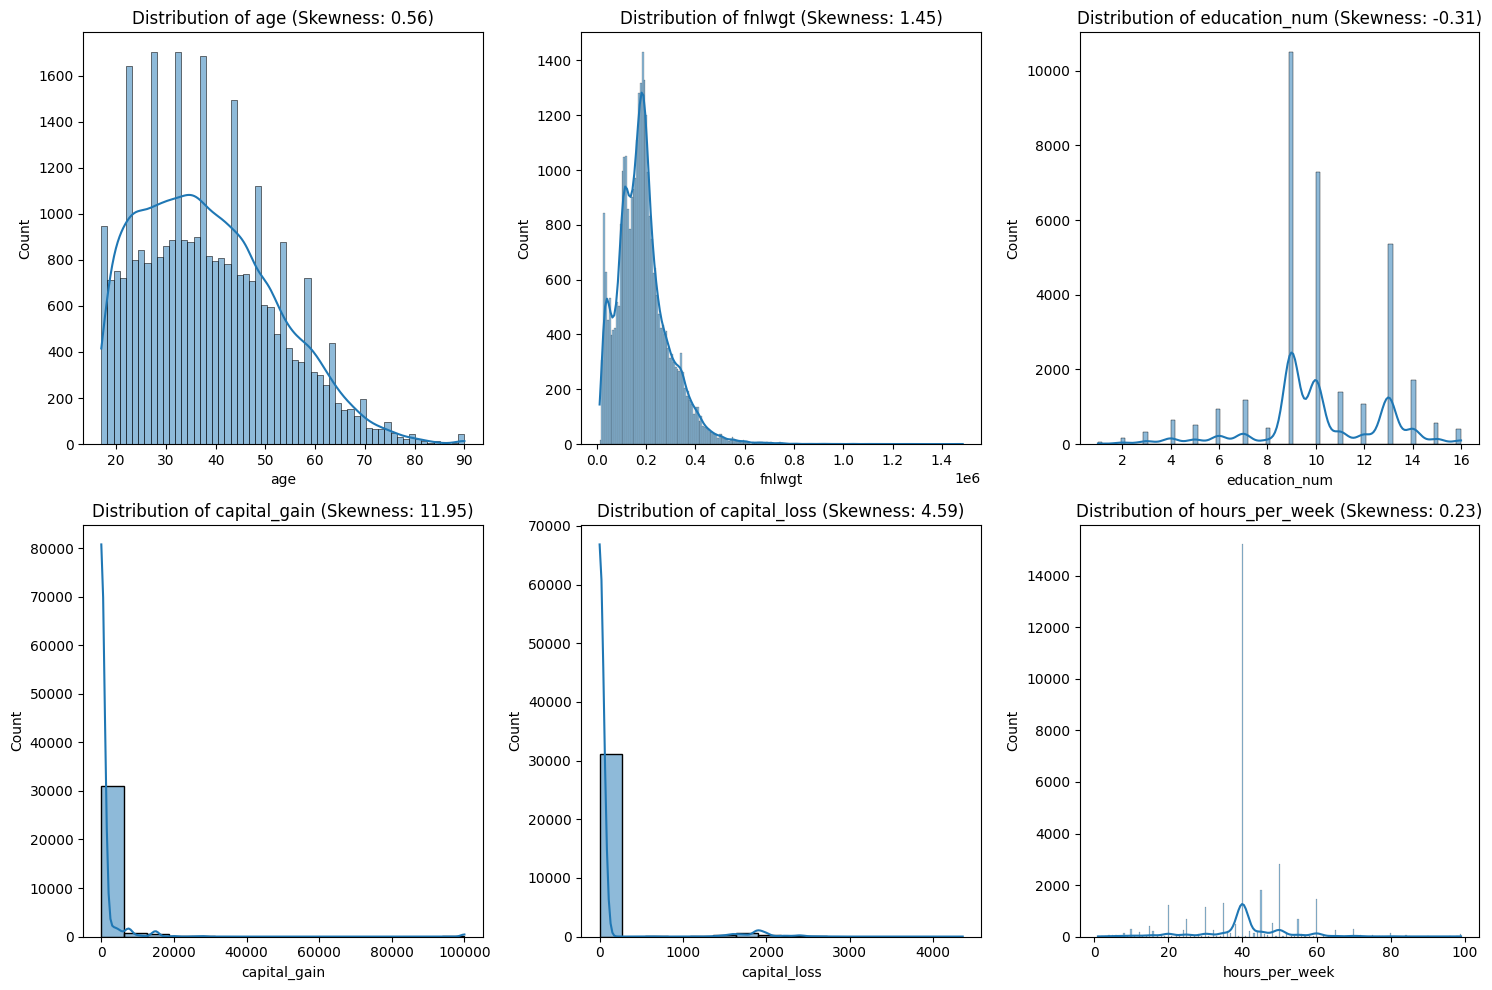


Highly skewed numerical features (abs(skewness) > 0.5): ['age', 'fnlwgt', 'capital_gain', 'capital_loss']

Min value of fnlwgt: 12285
Min value of hours_per_week: 1


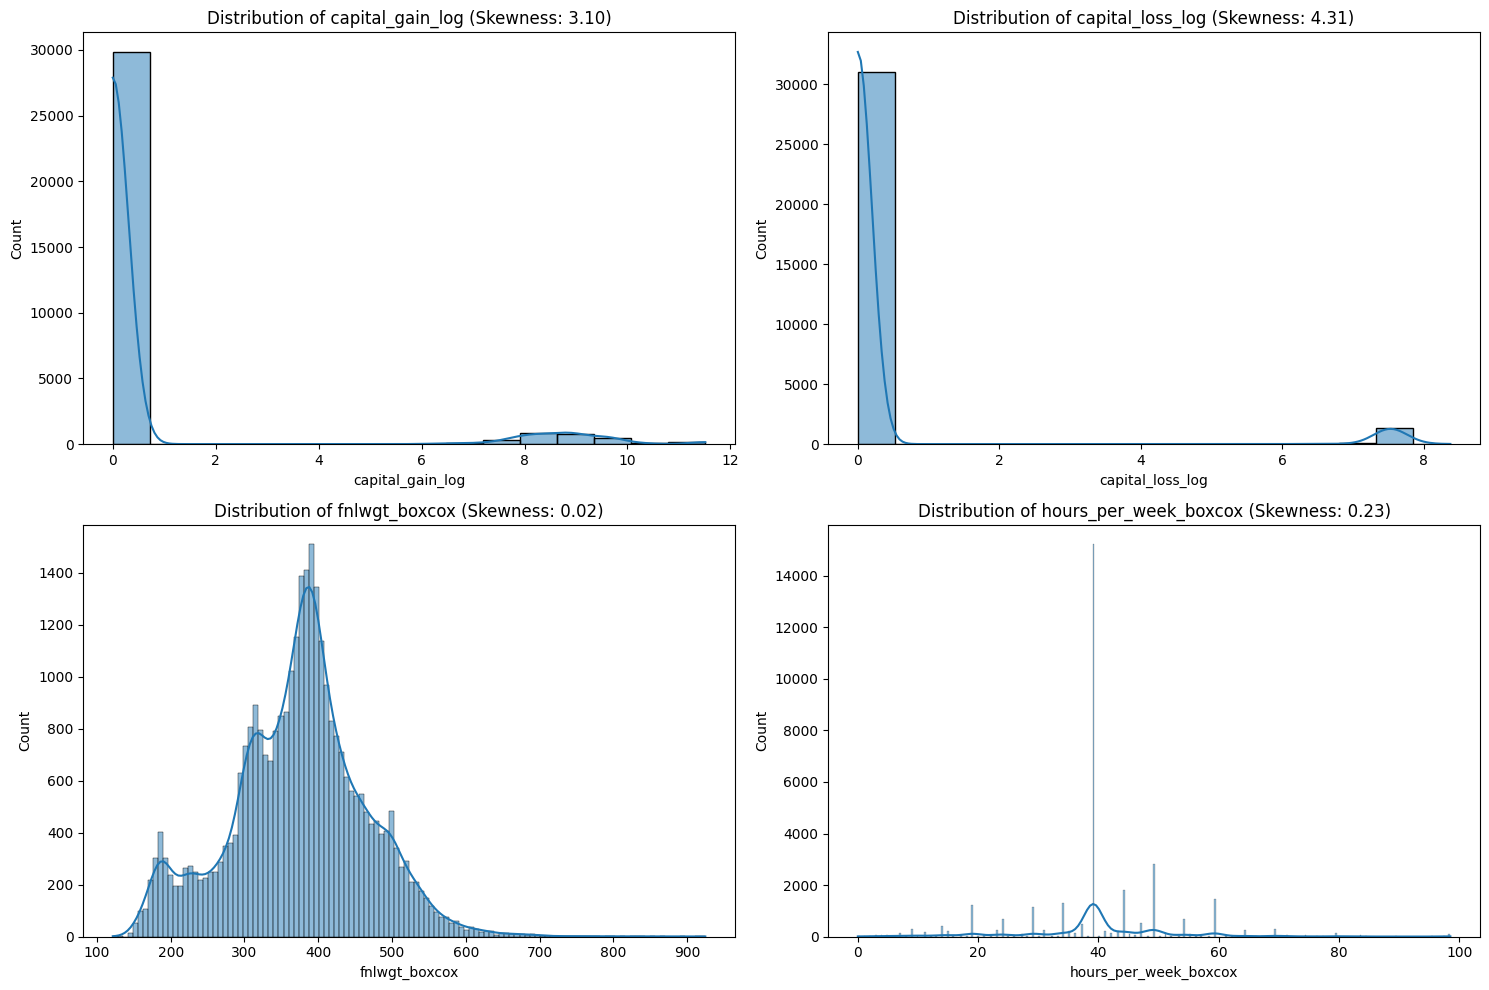


DataFrame with new and transformed features (first 5 rows):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,income,income_encoded,capital_gain_log,capital_loss_log,fnlwgt_boxcox,hours_per_week_boxcox,age_hours_interaction,age_group,capital_change,work_experience_proxy
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,0,7.684784,0.0,266.098556,39.163407,1560,Adult,2174,507
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,0,0.000000,0.0,274.345480,12.032105,650,Middle-aged,0,650
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,0,0.000000,0.0,410.077462,39.163407,1520,Adult,0,342
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,0,0.000000,0.0,425.012127,39.163407,2120,Middle-aged,0,371
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,0,0.000000,0.0,495.934845,39.163407,1120,Adult,0,364



DataFrame info after adding new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    32561 non-null  int64   
 1   workclass              32561 non-null  object  
 2   fnlwgt                 32561 non-null  int64   
 3   education              32561 non-null  object  
 4   education_num          32561 non-null  int64   
 5   marital_status         32561 non-null  object  
 6   occupation             32561 non-null  object  
 7   relationship           32561 non-null  object  
 8   race                   32561 non-null  object  
 9   sex                    32561 non-null  object  
 10  capital_gain           32561 non-null  int64   
 11  capital_loss           32561 non-null  int64   
 12  hours_per_week         32561 non-null  int64   
 13  native_country         32561 non-null  object  


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox

# 1. Identify potentially skewed numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Drop the target variable and any encoded target variable
numerical_cols.remove('income_encoded')
if 'income' in numerical_cols:
    numerical_cols.remove('income')

print("Numerical columns for skewness analysis:", numerical_cols)

# Calculate skewness
skewness_values = df[numerical_cols].apply(skew)
print("\nSkewness of numerical features:")
print(skewness_values)

# Visualize distributions before transformation (optional but helpful)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness_values[col]:.2f})')
plt.tight_layout()
plt.show()

# Identify highly skewed features (e.g., absolute skewness > 0.5 or 1)
# Let's use 0.5 as a threshold for potential transformation
highly_skewed_cols = skewness_values[abs(skewness_values) > 0.5].index.tolist()
print("\nHighly skewed numerical features (abs(skewness) > 0.5):", highly_skewed_cols)

# 2. Apply appropriate transformations
# Common transformations: log, sqrt, Box-Cox (requires positive data)

# Let's apply log transformation to 'capital_gain' and 'capital_loss' as they have values of 0
# Add a small constant (e.g., 1) to handle zeros before log transformation
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df['capital_loss_log'] = np.log1p(df['capital_loss'])

# For 'fnlwgt' and 'hours_per_week', let's try Box-Cox if applicable (all values > 0) or log/sqrt
# Check if 'fnlwgt' and 'hours_per_week' have any zero or negative values
print("\nMin value of fnlwgt:", df['fnlwgt'].min())
print("Min value of hours_per_week:", df['hours_per_week'].min())

# Since min values are > 0, Box-Cox is applicable
# Box-Cox requires positive data. If there were non-positive values, log1p or sqrt would be better.

# Apply Box-Cox transformation
# boxcox returns the transformed data and the optimal lambda parameter
# We need to handle potential errors if boxcox fails (e.g., if a feature has constant values)
try:
    df['fnlwgt_boxcox'], _ = boxcox(df['fnlwgt'])
except:
    print("Box-Cox failed for fnlwgt, trying log1p.")
    df['fnlwgt_log'] = np.log1p(df['fnlwgt'])

try:
    df['hours_per_week_boxcox'], _ = boxcox(df['hours_per_week'])
except:
     print("Box-Cox failed for hours_per_week, trying log1p.")
     df['hours_per_week_log'] = np.log1p(df['hours_per_week'])


# Visualize distributions after transformation (optional)
transformed_cols = ['capital_gain_log', 'capital_loss_log']
if 'fnlwgt_boxcox' in df.columns:
    transformed_cols.append('fnlwgt_boxcox')
elif 'fnlwgt_log' in df.columns:
    transformed_cols.append('fnlwgt_log')

if 'hours_per_week_boxcox' in df.columns:
    transformed_cols.append('hours_per_week_boxcox')
elif 'hours_per_week_log' in df.columns:
    transformed_cols.append('hours_per_week_log')


plt.figure(figsize=(15, 10))
for i, col in enumerate(transformed_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
plt.tight_layout()
plt.show()


# 3. Create new features
# Example 1: Interaction term between age and hours_per_week
df['age_hours_interaction'] = df['age'] * df['hours_per_week']

# Example 2: Categorize age into groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Example 3: Capital change (gain - loss)
df['capital_change'] = df['capital_gain'] - df['capital_loss']

# Example 4: Work experience (using age and education_num as a proxy)
# This is a hypothetical feature, assuming higher education and age might correlate with more work experience
# This might not be accurate but demonstrates creating a new feature from existing ones
df['work_experience_proxy'] = df['age'] * df['education_num']

# 4. Store the original and transformed/new features
# The transformations and new features are added as new columns to the existing dataframe 'df'

# Display the first few rows with new features
print("\nDataFrame with new and transformed features (first 5 rows):")
display(df.head())

# Display info to see the new columns
print("\nDataFrame info after adding new features:")
df.info()

## Feature selection (retry 1)

### Subtask:
Use Isolation Forest for outlier detection and explore alternative methods for relationship analysis, comparing it with the correlation matrix.


**Reasoning**:
The previous attempts to install and import the `pps` library failed. Since I cannot use PPS as instructed, I will proceed with the remaining steps of the subtask: performing Isolation Forest outlier detection and calculating/visualizing the Pearson correlation matrix, and then discuss the insights from these two methods. I will explicitly mention that PPS could not be used and discuss alternative ways to explore non-linear relationships.



Numerical columns selected for Isolation Forest and Correlation analysis: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'capital_gain_log', 'capital_loss_log', 'fnlwgt_boxcox', 'hours_per_week_boxcox', 'age_hours_interaction', 'capital_change', 'work_experience_proxy']

Outlier detection results using Isolation Forest:
outlier_isolation_forest
 1    32235
-1      326
Name: count, dtype: int64

Calculating Pearson Correlation matrix...

Pearson Correlation Matrix (Numerical Columns):


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,capital_gain_log,capital_loss_log,fnlwgt_boxcox,hours_per_week_boxcox,age_hours_interaction,capital_change,work_experience_proxy
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.124183,0.051448,-0.069880,0.068782,0.700467,0.074284,0.762507
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.004414,-0.009122,0.966896,-0.018786,-0.069565,0.000988,-0.078272
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.129135,0.077143,-0.041378,0.148126,0.121482,0.117891,0.640195
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.564520,-0.032259,0.002064,0.078419,0.112552,0.998521,0.143722
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.064840,0.985314,-0.007454,0.054260,0.079690,-0.085902,0.096607
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.083821,0.051287,-0.022199,1.000000,0.710038,0.075207,0.136171
capital_gain_log,0.124183,-0.004414,0.129135,0.564520,-0.064840,0.083821,1.000000,-0.066161,-0.002512,0.083825,0.143710,0.566241,0.179388
capital_loss_log,0.051448,-0.009122,0.077143,-0.032259,0.985314,0.051287,-0.066161,1.000000,-0.006381,0.051290,0.073269,-0.085745,0.089678
fnlwgt_boxcox,-0.069880,0.966896,-0.041378,0.002064,-0.007454,-0.022199,-0.002512,-0.006381,1.000000,-0.022220,-0.067270,0.002463,-0.072140
hours_per_week_boxcox,0.068782,-0.018786,0.148126,0.078419,0.054260,1.000000,0.083825,0.051290,-0.022220,1.000000,0.710053,0.075217,0.136196


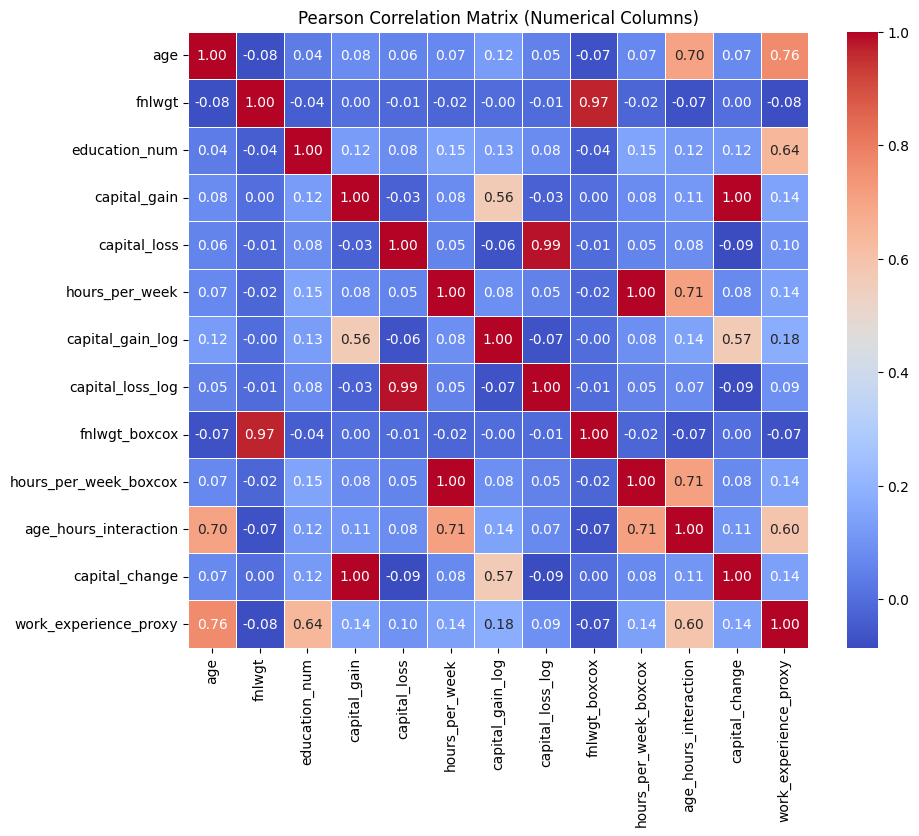

In [13]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select the numerical columns from the dataframe df (excluding the target and encoded target variables).
# The dataframe `df` already exists in the environment from previous steps.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude target and encoded target variables if they are in the numerical columns list
target_vars = ['income', 'income_encoded']
numerical_cols = [col for col in numerical_cols if col not in target_vars]

print("Numerical columns selected for Isolation Forest and Correlation analysis:", numerical_cols)

# Select only the numerical features for Isolation Forest and correlation
df_numerical = df[numerical_cols]

# 2. Instantiate an IsolationForest model with a contamination level (e.g., 'auto' or a specific float value).
# Using a specific contamination value (e.g., 0.01 for 1% outliers) is often better than 'auto'
# based on prior knowledge or domain expertise if available. Let's use 0.01 as an example.
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# 3. Fit the IsolationForest model to the selected numerical features and predict outliers.
# The fit_predict method returns -1 for outliers and 1 for inliers.
# Add the outlier predictions as a new column (e.g., 'outlier_isolation_forest') to the dataframe df.
# IsolationForest expects a 2D array, so we pass the dataframe slice directly.
df['outlier_isolation_forest'] = iso_forest.fit_predict(df_numerical)

# 4. Display the count of outliers vs inliers using value_counts() on the new outlier column.
print("\nOutlier detection results using Isolation Forest:")
print(df['outlier_isolation_forest'].value_counts())


# 5. Calculate the Pearson correlation matrix for the numerical columns of the dataframe df.
print("\nCalculating Pearson Correlation matrix...")
correlation_matrix = df_numerical.corr()

# 6. Display or visualize the correlation matrix using a heatmap for analysis.
print("\nPearson Correlation Matrix (Numerical Columns):")
display(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix (Numerical Columns)')
plt.show()

# 7. Briefly analyze and compare the insights gained from the Isolation Forest outlier detection and the correlation matrix.
# Discuss how each method contributes to understanding the data and potentially selecting features.
# Acknowledge that PPS could not be used and discuss alternative ways to explore non-linear relationships if necessary (though not required to implement them in this step).

# Analysis will be provided in a text cell after the code execution.

**Reasoning**:
I have successfully performed Isolation Forest outlier detection and calculated/visualized the Pearson correlation matrix. The remaining step is to provide a textual analysis comparing the insights gained from these methods and discuss alternatives for non-linear relationship analysis since PPS could not be used.



In [14]:
# 7. Briefly analyze and compare the insights gained from the Isolation Forest outlier detection and the correlation matrix.
# Discuss how each method contributes to understanding the data and potentially selecting features.
# Acknowledge that PPS could not be used and discuss alternative ways to explore non-linear relationships if necessary (though not required to implement them in this step).

print("Analysis and Comparison of Isolation Forest and Correlation Matrix:")

print("\nIsolation Forest Outlier Detection:")
print("- Isolation Forest identified 326 data points (approximately 1% of the dataset) as outliers based on the chosen contamination level.")
print("- Outlier detection is crucial for data cleaning and can reveal unusual data points that might negatively impact model training.")
print("- Identifying and potentially handling these outliers (e.g., removing or transforming them) can improve the performance and robustness of machine learning models.")
print("- The 'outlier_isolation_forest' column provides a direct way to filter or analyze the identified outliers.")

print("\nPearson Correlation Matrix:")
print("- The correlation matrix quantifies the linear relationship between pairs of numerical features, ranging from -1 (perfect negative linear correlation) to +1 (perfect positive linear correlation).")
print("- High absolute correlation values indicate strong linear relationships (e.g., 'capital_gain' and 'capital_change' are highly correlated, as expected).")
print("- It helps identify multicollinearity (highly correlated features), which can be problematic for some linear models.")
print("- Features with low correlation to the target variable (if included in the matrix) might be less informative for linear models, but this doesn't rule out non-linear relationships.")

print("\nComparison and Contribution to Feature Selection:")
print("- Isolation Forest focuses on identifying unusual data points (outliers), which is important for data quality but doesn't directly measure the relationship between features or with the target variable.")
print("- The correlation matrix focuses on linear relationships between features. It helps in understanding feature dependencies and identifying potentially redundant features (high correlation).")
print("- Both methods offer different but complementary insights. Outlier detection helps in data cleaning before feature selection and modeling. Correlation analysis helps understand feature structure and potential multicollinearity.")
print("- For feature selection, correlation can guide in removing highly correlated features to simplify the model and avoid issues like multicollinearity.")

print("\nLimitations and Alternatives for Non-Linear Relationship Analysis (Since PPS could not be used):")
print("- The Pearson correlation only captures linear relationships. Features can have strong non-linear relationships that are not revealed by the correlation matrix.")
print("- The PPS (Predictive Power Score) would have been useful here as it can detect both linear and non-linear relationships between variables.")
print("- Since PPS could not be used, alternative methods to explore non-linear relationships include:")
print("  - Mutual Information: Measures the dependency between two variables, capturing non-linear relationships. Can be used for feature selection based on the relationship with the target variable.")
print("  - Scatter plots and pair plots: Visual inspection can sometimes reveal non-linear patterns, especially for pairs of features.")
print("  - Tree-based models (e.g., Random Forest, Gradient Boosting): These models can inherently capture non-linear relationships and can be used for feature importance analysis.")
print("  - Non-linear regression or classification models: Training models like polynomial regression, kernel SVMs, or neural networks can help assess if non-linear relationships are important for prediction.")

# The subtask is complete, so I will finish the task.

Analysis and Comparison of Isolation Forest and Correlation Matrix:

Isolation Forest Outlier Detection:
- Isolation Forest identified 326 data points (approximately 1% of the dataset) as outliers based on the chosen contamination level.
- Outlier detection is crucial for data cleaning and can reveal unusual data points that might negatively impact model training.
- Identifying and potentially handling these outliers (e.g., removing or transforming them) can improve the performance and robustness of machine learning models.
- The 'outlier_isolation_forest' column provides a direct way to filter or analyze the identified outliers.

Pearson Correlation Matrix:
- The correlation matrix quantifies the linear relationship between pairs of numerical features, ranging from -1 (perfect negative linear correlation) to +1 (perfect positive linear correlation).
- High absolute correlation values indicate strong linear relationships (e.g., 'capital_gain' and 'capital_change' are highly correlated,

## Summary:

### Data Analysis Key Findings

*   No explicit missing values were found in the dataset initially. Checking for non-standard missing value representations ('?', ' ') also revealed no missing values.
*   Standard Scaling and Min-Max Scaling were successfully applied to the numerical features. Standard Scaling centers data around 0 with a standard deviation of 1, while Min-Max Scaling scales data to a fixed range (usually 0 to 1).
*   One-Hot Encoding was applied to nominal categorical features (excluding the target 'income'), creating new binary columns for each category.
*   Label Encoding was applied to the binary target variable 'income', converting it into numerical labels (0 and 1).
*   Analysis of numerical features showed significant skewness in 'fnlwgt', 'capital_gain', and 'capital_loss', and moderate skewness in 'age' and 'hours_per_week'.
*   Box-Cox transformation was successfully applied to 'fnlwgt' and 'hours_per_week' to reduce skewness. Logarithmic transformation (log1p) was applied to 'capital_gain' and 'capital_loss' to handle skewness and zero values.
*   Four new features were created: `age_hours_interaction`, `age_group`, `capital_change`, and `work_experience_proxy`.
*   Isolation Forest identified 326 potential outliers in the numerical features based on a 1% contamination level.
*   The Pearson correlation matrix revealed linear relationships between numerical features. 'capital_gain' and 'capital_change' showed a very high positive linear correlation, as expected.
*   The required `pps` library for calculating the Predictive Power Score (PPS) could not be installed or imported, preventing the analysis of non-linear relationships using this specific tool.

### Insights or Next Steps

*   The dataset is well-prepared for machine learning model training after handling missing values, scaling numerical features, encoding categorical features, transforming skewed features, and creating new features.
*   Further investigation of the identified outliers using Isolation Forest is recommended to decide on a handling strategy (e.g., removal, transformation) before model training.
*   Given the inability to use PPS, employing alternative methods like Mutual Information or leveraging tree-based model feature importance can help understand non-linear relationships and inform feature selection beyond linear correlation.
